In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_mh=pd.read_csv('survey.csv')
df_mh.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [4]:
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
df_mh.shape

(1259, 27)

In [7]:
df_mh=df_mh.drop(['Timestamp','state','comments','remote_work','no_employees'],1).head()

In [8]:
df_mh.isnull().sum()/len(df_mh)*100

Age                            0.0
Gender                         0.0
Country                        0.0
self_employed                100.0
family_history                 0.0
treatment                      0.0
work_interfere                 0.0
tech_company                   0.0
benefits                       0.0
care_options                   0.0
wellness_program               0.0
seek_help                      0.0
anonymity                      0.0
leave                          0.0
mental_health_consequence      0.0
phys_health_consequence        0.0
coworkers                      0.0
supervisor                     0.0
mental_health_interview        0.0
phys_health_interview          0.0
mental_vs_physical             0.0
obs_consequence                0.0
dtype: float64

In [9]:
df_mh=df_mh.drop(['self_employed'],1).head()

In [10]:
df_mh.isnull().sum()/len(df_mh)*100

Age                          0.0
Gender                       0.0
Country                      0.0
family_history               0.0
treatment                    0.0
work_interfere               0.0
tech_company                 0.0
benefits                     0.0
care_options                 0.0
wellness_program             0.0
seek_help                    0.0
anonymity                    0.0
leave                        0.0
mental_health_consequence    0.0
phys_health_consequence      0.0
coworkers                    0.0
supervisor                   0.0
mental_health_interview      0.0
phys_health_interview        0.0
mental_vs_physical           0.0
obs_consequence              0.0
dtype: float64

In [11]:
df_mh['Gender']=df_mh['Gender'].replace({'M':'Male','Male':'Male'})

Text(0.5, 0, 'Treatment')

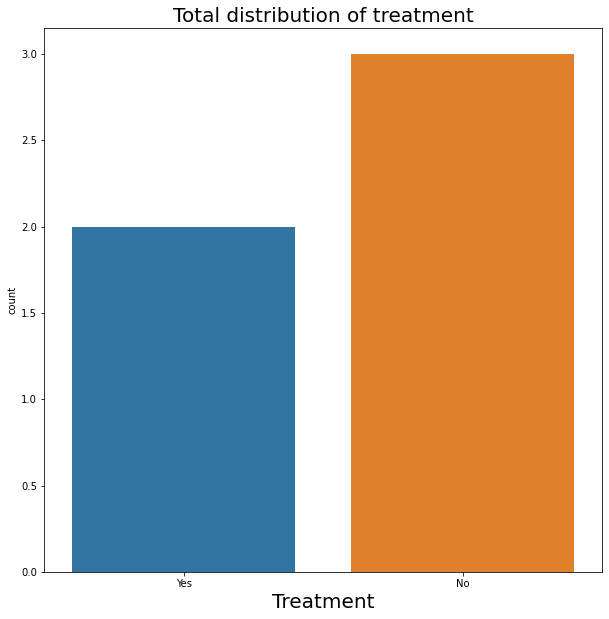

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(df_mh['treatment'])
plt.title('Total distribution of treatment',fontsize=20)
plt.xlabel('Treatment',fontsize=20)

### The plot shows there are more number of employees who have not treated mental health illness

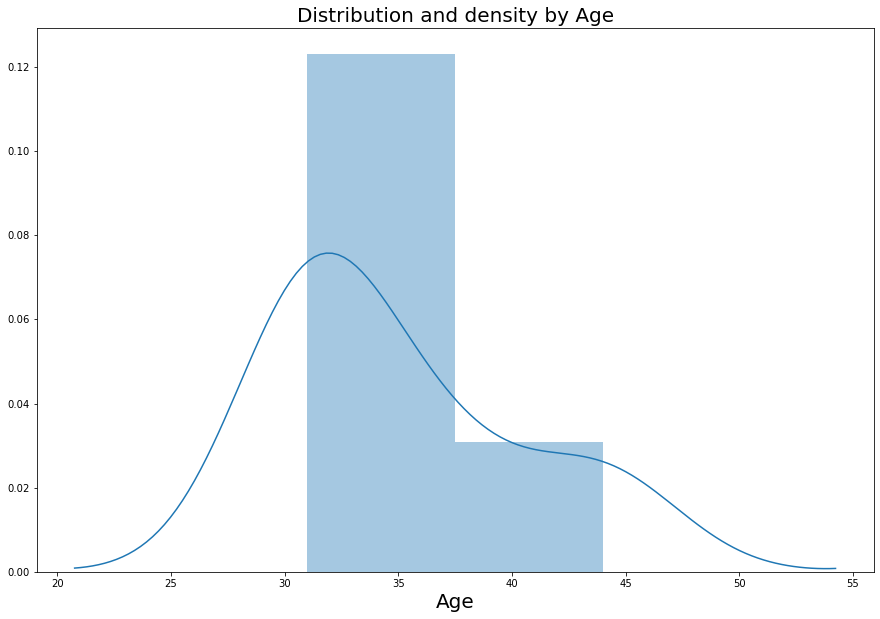

In [13]:
plt.figure(figsize=(15,10))
sns.distplot(df_mh['Age'])
plt.title('Distribution and density by Age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.show()

In [ ]:
df

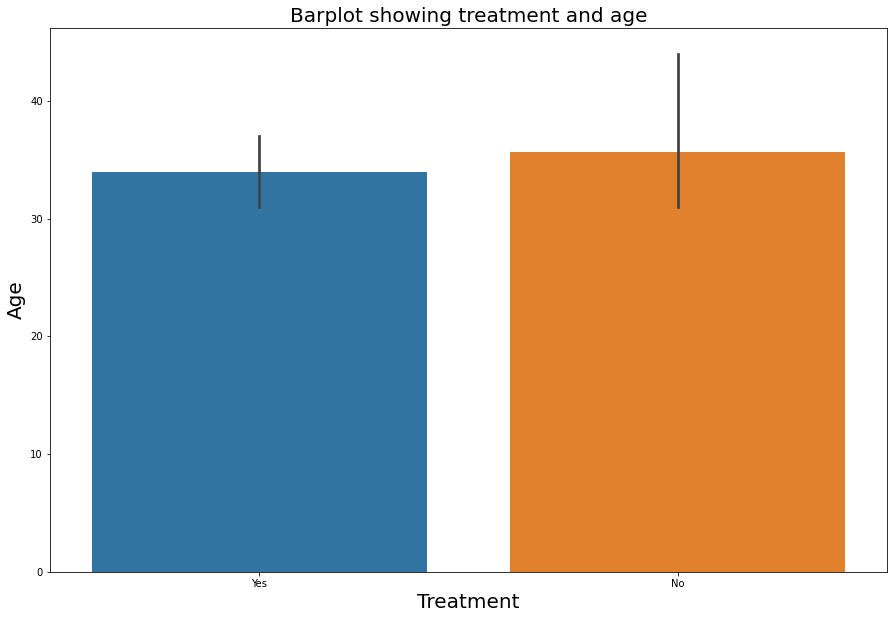

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(df_mh['treatment'],df_mh['Age'])
plt.title('Barplot showing treatment and age',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.xlabel('Treatment',fontsize=20)
plt.show()

Text(0.5, 0, 'Country')

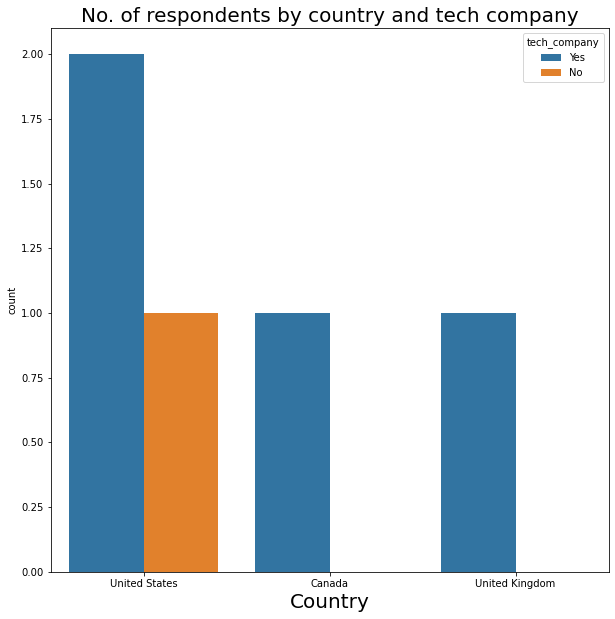

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(df_mh['Country'],hue=df_mh['tech_company'])
plt.title('No. of respondents by country and tech company',fontsize=20)
plt.xlabel('Country',fontsize=20)

#### There are more no. of techns in US than in other countries.

Text(0.5, 0, 'Gender')

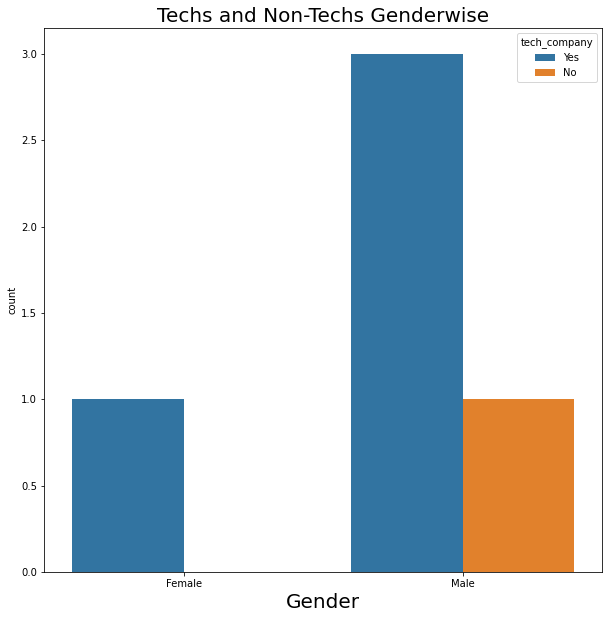

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(df_mh['Gender'],hue=df_mh['tech_company'])
plt.title('Techs and Non-Techs Genderwise',fontsize=20)
plt.xlabel('Gender',fontsize=20)

#### There are more number of techns in male than in female

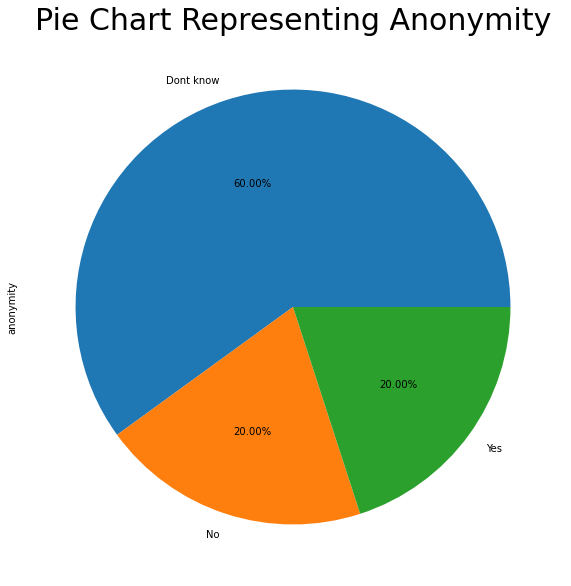

In [19]:
plt.figure(figsize=(10,10))
labels = 'Dont know','No','Yes'
explode = [0, 0,0]
plt.title('Pie Chart Representing Anonymity', fontsize = 30)
df_mh['anonymity'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=explode,labels=labels)

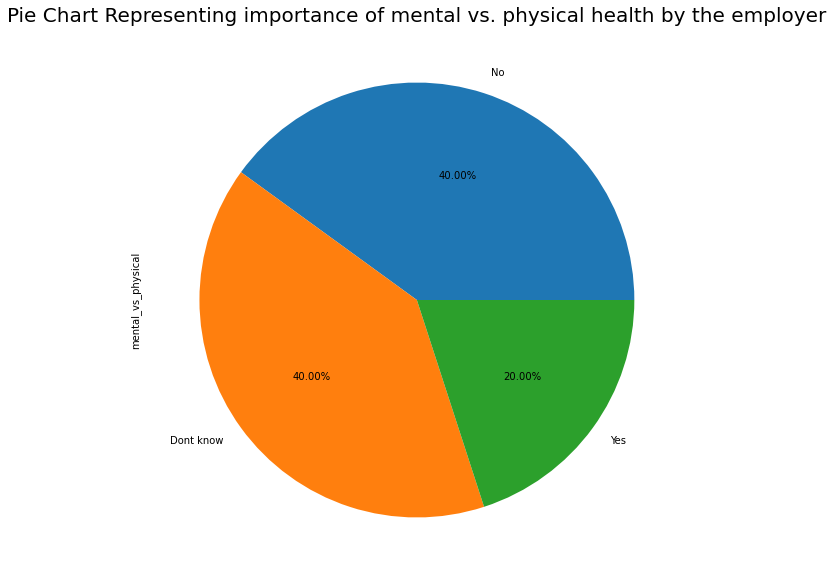

In [20]:
plt.figure(figsize=(10,10))
labels = 'No','Dont know','Yes'
explode = [0, 0,0]
plt.title('Pie Chart Representing importance of mental vs. physical health by the employer', fontsize = 20)
df_mh['mental_vs_physical'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=explode,labels=labels)

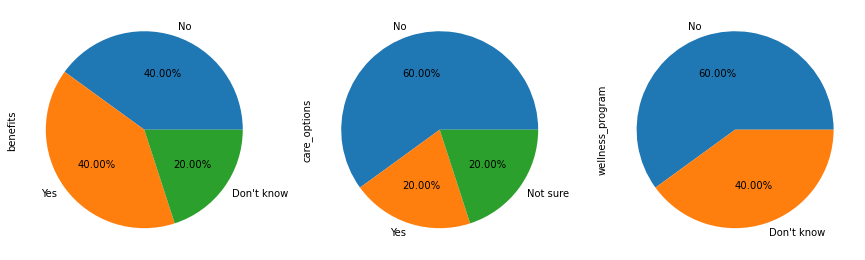

In [21]:
fig, axes = plt.subplots(1,3, figsize = (15,5))
df_mh['benefits'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[0])
df_mh['care_options'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[1])
df_mh['wellness_program'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[2])
plt.show()

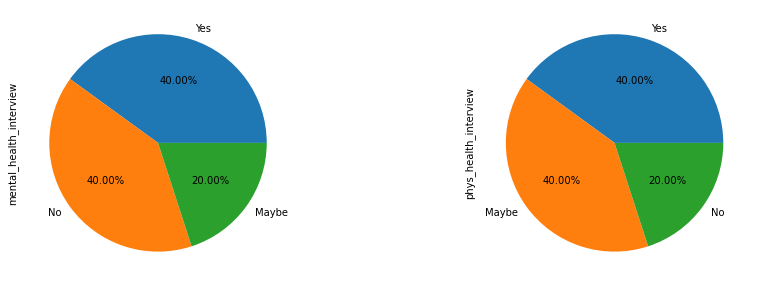

In [22]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
df_mh['mental_health_interview'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[0])
df_mh['phys_health_interview'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[1])
plt.show()

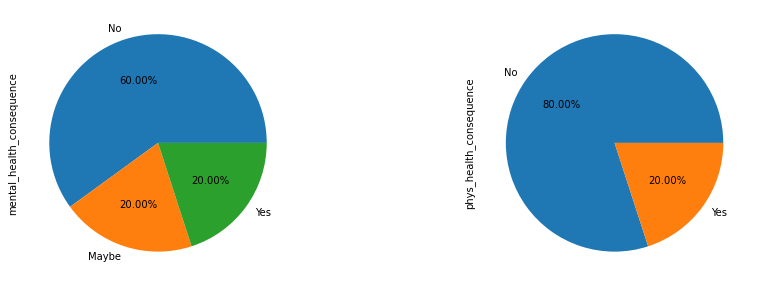

In [270]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
df_mh['mental_health_consequence'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[0])
df_mh['phys_health_consequence'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[1])
plt.show()

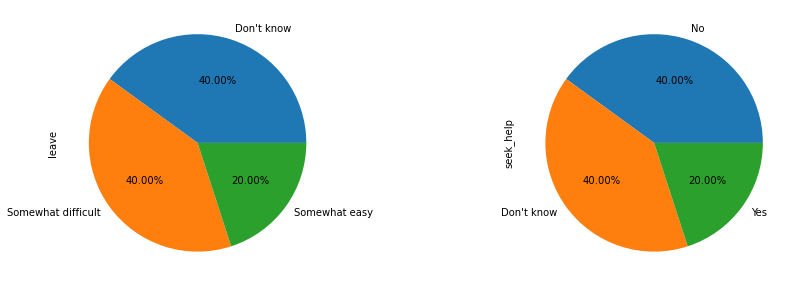

In [275]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
df_mh['leave'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[0])
df_mh['seek_help'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[1])
plt.show()

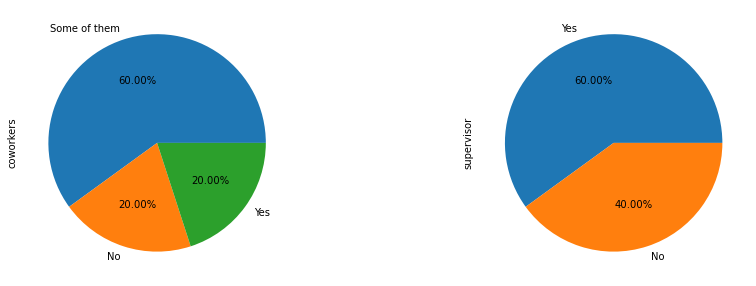

In [276]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
df_mh['coworkers'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[0])
df_mh['supervisor'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[1])
plt.show()

# INFERENCE:

#### There are more number of employees in the data who have not treated mental health illness
#### There are more techs in US when compared with other countries.
#### The gender male has more techs than female.
#### It is sad to realise that only 20% of the employees claim that anonymity is protected and 60% of employees are not aware if anonymity is protected.
#### Employers does not take mental health illness as serious as physical health illness
#### Only 40% of the employees have claims that employer provide mental health benefits.
#### Only 20%of employees know the options for mental health care the  employer provides
#### About 60% of the employees say that the employer has not discussed mental health as part of an employee wellness program.
#### The chart explains that over 40% of the employees opens up about mental health illness to the potential employer in an interview.
#### The chart explains that over 40% of the employees opens up about physical health illness to the potential employer in an interview.
#### The chart explains that about 60% of the employees that discussing a mental health issue with  employer will not have negative consequences
#### The chart explains that about 80% of the employees that discussing a physical health issue with  employer will not have negative consequences
#### Over 40% of the employees have claimed that it is difficult to take medical leave for mental health condition.
#### Over  40% of the employees say that the employer does not provide resources to learn more about mental health issues nor to seek help.
#### Only 20% of the employees are willing to discuss about their mental health issue to their co-workers.
#### About 60% of the employees are  willing to discuss their  mental health issue with their direct supervisors.